In [38]:
#Setup#
import pandas as pd
import numpy as np
import yellowbrick
import matplotlib.pyplot as plt
import statsmodels.api as sm

# **Gold vs USD**
## *How has gold changed as the USD has been inflated?*
The coronavirus has completely changed the world. It has caused unbelievable movements by governments around the country. Causing them to rethink economic strategies, some reopening too soon, others printing money. This has caused mmany individuals to question what should be invested in during times like this, and are we headed into a recession or financial collapse. 

In my case study I am going to look how the price of gold has changed from 1950 to 2019(Which is the last annual price provided) in comparison to the USD with inflation.The goal of this case study is to analyze how the price of gold and dollar is impacted through various country wide or global events. I will highlight these events to show how the value has changed.

These can be various events such as a change in Presidential power as with the year 2020, global pandemics, or financial crises. I hope to be able to analyze and see how these prices have changed over the period of time. My goal is to be able to predict the potential changes for gold and the USD in the future.  

The overall goal is to gain a better understanding of the price of gold, the usd, and inflation. After seeing these results you should have a better understanding on how to properly invest your money during a potential recession or economic issues like the coronavirus. 


In [39]:
#Loads data for gold and USD#
YearlyGold= pd.read_csv('/Users/Brett/Desktop/GoldChanges .csv')
YearlyUSD= pd.read_csv('/Users/Brett/Desktop/USDInflationClean.csv')

In [40]:
#Shows Yearly Gold Data and provides dimensions#
print(YearlyGold)
print(YearlyGold.head())
print(YearlyGold.shape)

    year     price
0   1950    34.720
1   1951    34.660
2   1952    34.790
3   1953    34.850
4   1954    35.040
..   ...       ...
65  2015  1068.317
66  2016  1152.165
67  2017  1265.674
68  2018  1249.887
69  2019  1480.025

[70 rows x 2 columns]
   year  price
0  1950  34.72
1  1951  34.66
2  1952  34.79
3  1953  34.85
4  1954  35.04
(70, 2)


In [41]:
#Describes Gold data#
print('Describe Yearly Gold Data:')
print(YearlyGold['price'].describe())


Describe Yearly Gold Data:
count      70.000000
mean      412.776457
std       444.932209
min        34.660000
25%        35.277500
50%       320.803500
75%       458.943500
max      1687.342000
Name: price, dtype: float64


In [42]:
#Shows Yearly USD Data and provides dimensions#
print(YearlyUSD)
print(YearlyUSD.head())
print(YearlyUSD.shape)

    year  price  inflation rate
0   1950   1.91            0.01
1   1951   2.06            0.08
2   1952   2.10            0.02
3   1953   2.12            0.01
4   1954   2.13            0.01
..   ...    ...             ...
65  2015  18.81            0.00
66  2016  19.05            0.01
67  2017  19.45            0.02
68  2018  19.94            0.02
69  2019  20.29            0.02

[70 rows x 3 columns]
   year  price  inflation rate
0  1950   1.91            0.01
1  1951   2.06            0.08
2  1952   2.10            0.02
3  1953   2.12            0.01
4  1954   2.13            0.01
(70, 3)


In [43]:
#Describes USD data#
print('Describe Yearly USD Data:')
print(YearlyUSD['price'].describe())

Describe Yearly USD Data:
count    70.000000
mean      9.033286
std       6.170421
min       1.910000
25%       2.677500
50%       8.395000
75%      14.225000
max      20.290000
Name: price, dtype: float64


In [44]:
#Inflation Data#
print('Describe Yearly USD Inflation Data:')
print(YearlyUSD['inflation rate'].describe())

Describe Yearly USD Inflation Data:
count    70.000000
mean      0.034714
std       0.027065
min       0.000000
25%       0.020000
50%       0.030000
75%       0.040000
max       0.130000
Name: inflation rate, dtype: float64


In [45]:
#Cleaning Data#
YearlyUSD.rename(columns={'year': 'YEAR'}, inplace=True)
YearlyUSD.rename(columns={'price': 'PRICE'}, inplace=True)
YearlyUSD.rename(columns={'inflation rate': 'INFLATION'}, inplace=True)
YearlyGold.rename(columns={'year': 'YEAR'}, inplace=True)
YearlyGold.rename(columns={'price': 'PRICE'}, inplace=True)

print(YearlyGold)
print(YearlyUSD)

    YEAR     PRICE
0   1950    34.720
1   1951    34.660
2   1952    34.790
3   1953    34.850
4   1954    35.040
..   ...       ...
65  2015  1068.317
66  2016  1152.165
67  2017  1265.674
68  2018  1249.887
69  2019  1480.025

[70 rows x 2 columns]
    YEAR  PRICE  INFLATION
0   1950   1.91       0.01
1   1951   2.06       0.08
2   1952   2.10       0.02
3   1953   2.12       0.01
4   1954   2.13       0.01
..   ...    ...        ...
65  2015  18.81       0.00
66  2016  19.05       0.01
67  2017  19.45       0.02
68  2018  19.94       0.02
69  2019  20.29       0.02

[70 rows x 3 columns]


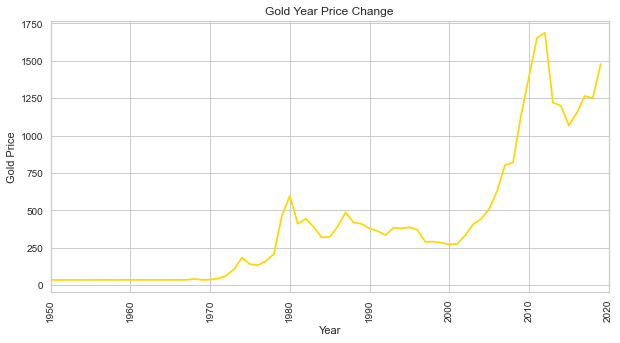

In [46]:
#Line chart describing the price of gold over the years#
xg= YearlyGold.YEAR
yg= YearlyGold.PRICE
plt.title('Gold Year Price Change')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.xticks(rotation=90)
plt.xlim(1950,2020)
plt.plot(xg,yg, color= 'gold')


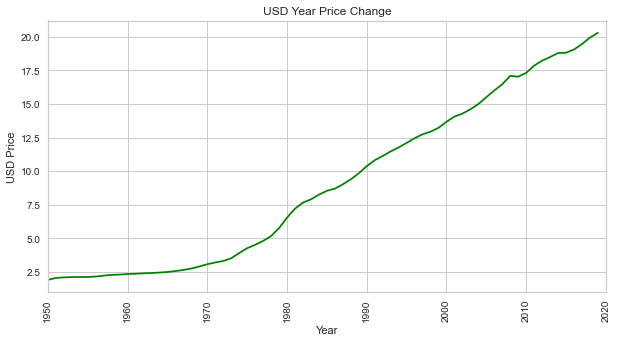

In [47]:
#Line chart describing the price of USD price over the years#
xu= YearlyUSD.YEAR
yu= YearlyUSD.PRICE
plt.title('USD Year Price Change')
plt.xlabel('Year')
plt.ylabel('USD Price')
plt.xticks(rotation=90)
plt.xlim(1950,2020)
plt.plot(xu,yu, color= 'green')


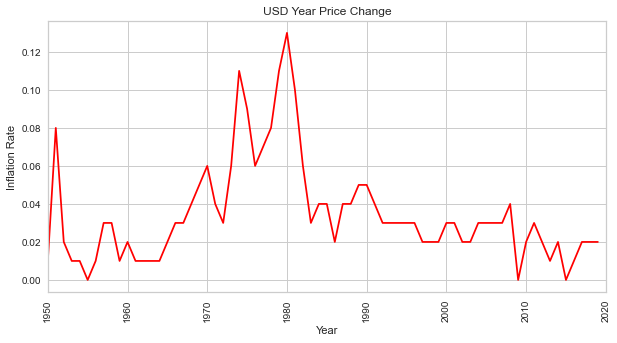

In [48]:
#Line chart describing the price of USD inflation over the years#
xi= YearlyUSD.YEAR
yi= YearlyUSD.INFLATION
plt.title('USD Year Price Change')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=90)
plt.xlim(1950,2020)
plt.plot(xi,yi, color= 'red')



(1950.0, 2020.0)

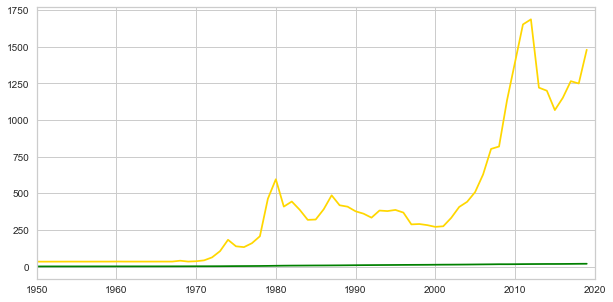

In [49]:
plt.plot(xu,yu, color= 'green', label='USD')
plt.plot(xg,yg, color= 'gold', label='Gold')
plt.xlim(1950,2020)

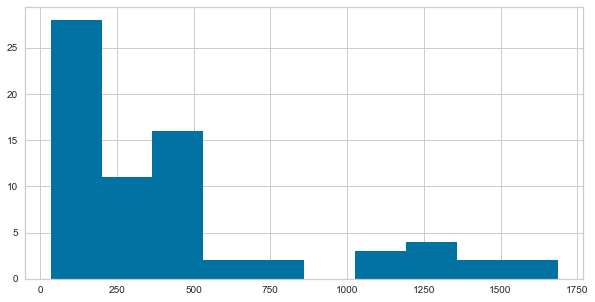

In [50]:
#Histogram showing price of gold#
plt.hist(yg, bins = 10)
plt.show()

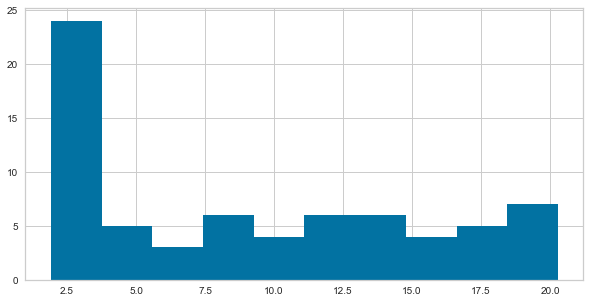

In [51]:
#Histogram showing USD#

plt.hist(yu, bins = 10)
plt.show()

In [52]:
#Dimensionality and Feature Reduction#
import numpy as np

# log-transformation for Gold#
def log_transformation(YearlyGold):
    return YearlyGold.apply(np.log1p)

YearlyGold['GPRICE_log1p'] = log_transformation(YearlyGold['PRICE'])

# check the data for Gold#
print(YearlyGold['GPRICE_log1p'])

0     3.575711
1     3.574030
2     3.577669
3     3.579344
4     3.584629
        ...   
65    6.974775
66    7.050266
67    7.144150
68    7.131608
69    7.300490
Name: GPRICE_log1p, Length: 70, dtype: float64


In [53]:
# log-transformation for USD#
def log_transformation(YearlyUSD):
    return YearlyUSD.apply(np.log1p)

YearlyUSD['DPRICE_log1p'] = log_transformation(YearlyUSD['PRICE'])

# check the data for USD#
print(YearlyUSD['DPRICE_log1p'])

0     1.068153
1     1.118415
2     1.131402
3     1.137833
4     1.141033
        ...   
65    2.986187
66    2.998229
67    3.017983
68    3.041661
69    3.058237
Name: DPRICE_log1p, Length: 70, dtype: float64


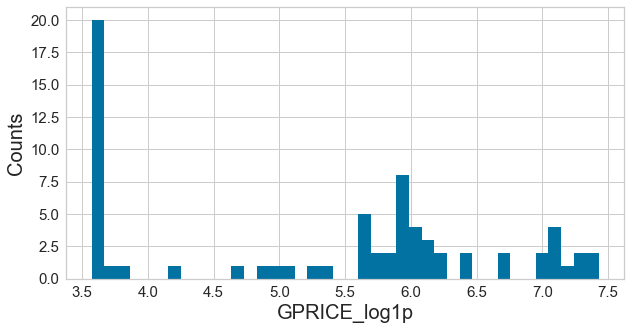

In [54]:
#Adjust skewed data Gold
#check the distribution using histogram
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(YearlyGold['GPRICE_log1p'] , bins=40)
plt.xlabel('GPRICE_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

#No Categorical Data to Convert#

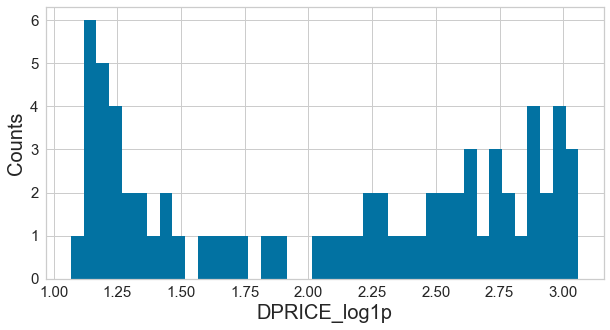

In [55]:
#Adjust skewed data USD
#check the distribution using histogram
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(YearlyUSD['DPRICE_log1p'] , bins=40)
plt.xlabel('DPRICE_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

#No Categorical Data to Convert#

In [56]:
#Below will create and plot regressions as well as develop predictive future pricings for gold and usd#
#Providing linear regression for gold, usd, and inflation utilizing log prices#

YearlyGold['logpricegold']= np.log(YearlyGold.PRICE)
YearlyGold

,YEAR,PRICE,GPRICE_log1p,logpricegold
0,1950,34.720,3.575711,3.547316
1,1951,34.660,3.574030,3.545586
2,1952,34.790,3.577669,3.549330
3,1953,34.850,3.579344,3.551053
4,1954,35.040,3.584629,3.556490
...,...,...,...,...
65,2015,1068.317,6.974775,6.973840
66,2016,1152.165,7.050266,7.049398
67,2017,1265.674,7.144150,7.143360
68,2018,1249.887,7.131608,7.130808


In [57]:
#Creates regression model for gold#
X1 = YearlyGold.YEAR
X1 = sm.add_constant(X1)
y1 = YearlyGold.logpricegold
mod = sm.OLS(y1,X1)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           logpricegold   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     467.0
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.58e-32
Time:                        10:52:55   Log-Likelihood:                -46.938
No. Observations:                  70   AIC:                             97.88
Df Residuals:                      68   BIC:                             102.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.4672      5.635    -20.667      0.0

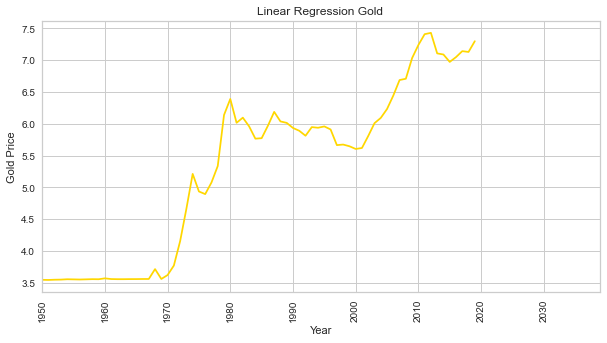

In [58]:
#Plots regression for Gold# 
plt.title('Linear Regression Gold ')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.xticks(rotation=90)
plt.xlim(1950,2039)
plt.plot(X1,y1, color= 'gold')

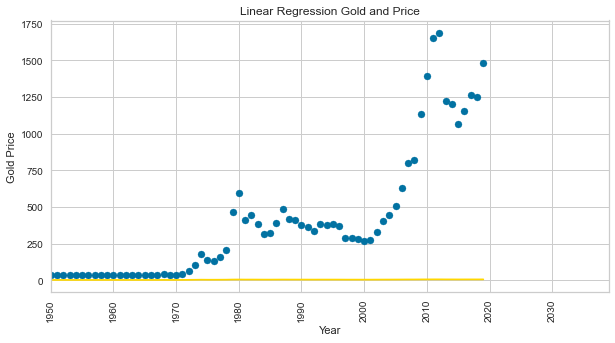

In [59]:
#Plots linear regression for gold compared with current data points
xg= YearlyGold.YEAR
yg= YearlyGold.PRICE
plt.title('Linear Regression Gold and Price')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.xticks(rotation=90)
plt.xlim(1950,2039)
plt.scatter(xg,yg)
plt.plot(X1,y1, color= 'gold')



In [60]:
#Below is the prediction model formula we would utilize it has been commented out#
#x(t) = 2.6238422e-51 * 1.0633241588^(t)#
#Predicts 10 year#
one=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2020)
two=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2021)
three=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2022)
four=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2023)
five=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2024)
six=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2025)
seven=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2026)
eight=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2027)
nine=.0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2028)
ten= .0000000000000000000000000000000000000000000000000026238422 * 1.0633241588**(2029)
print(one,two, three, four, five, six, seven, eight, nine, ten)

1921.3819980524177 2043.0518968125505 2172.42643956295 2309.993516403152 2456.2719126628363 2611.8132653162766 2777.204143285111 2953.0682594745153 3140.0688228847193 3338.9110396680003


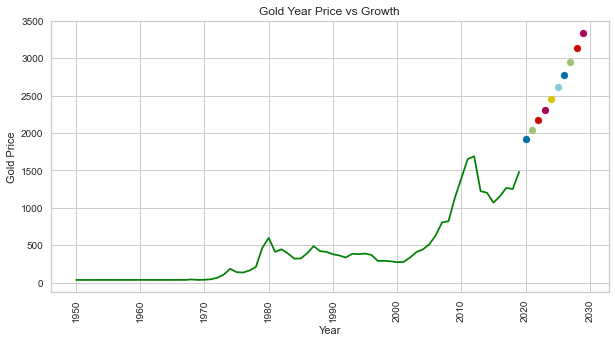

In [61]:
#Shows exponential growth the price of the Gold to the year 2029 which is ten years from the date#
xu= YearlyGold.YEAR
yu= YearlyGold.PRICE
plt.title('Gold Year Price vs Growth')
plt.xlabel('Year')
plt.ylabel('Gold Price')
plt.xticks(rotation=90)
plt.scatter(2020, 1921.38)
plt.scatter(2021, 2043.05)
plt.scatter(2022, 2172.43)
plt.scatter(2023, 2309.99)
plt.scatter(2024, 2456.27)
plt.scatter(2025, 2611.81)
plt.scatter(2026, 2777.20)
plt.scatter(2027, 2953.07)
plt.scatter(2028, 3140.07)
plt.scatter(2029, 3338.911)
plt.plot(xu,yu, color= 'green')


In [62]:
#Creates log of USD# 
YearlyUSD['logpriceusd']= np.log(YearlyUSD.PRICE)
YearlyUSD

,YEAR,PRICE,INFLATION,DPRICE_log1p,logpriceusd
0,1950,1.91,0.01,1.068153,0.647103
1,1951,2.06,0.08,1.118415,0.722706
2,1952,2.10,0.02,1.131402,0.741937
3,1953,2.12,0.01,1.137833,0.751416
4,1954,2.13,0.01,1.141033,0.756122
...,...,...,...,...,...
65,2015,18.81,0.00,2.986187,2.934389
66,2016,19.05,0.01,2.998229,2.947067
67,2017,19.45,0.02,3.017983,2.967847
68,2018,19.94,0.02,3.041661,2.992728


In [77]:
#Creates regression for USD data# 
X2 = YearlyUSD.YEAR
X2 = sm.add_constant(X2)
y2 = YearlyUSD.logpriceusd
mod = sm.OLS(y2,X2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            logpriceusd   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1824.
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           7.68e-51
Time:                        11:12:46   Log-Likelihood:                 31.087
No. Observations:                  70   AIC:                            -58.17
Df Residuals:                      68   BIC:                            -53.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -77.0308      1.849    -41.669      0.0

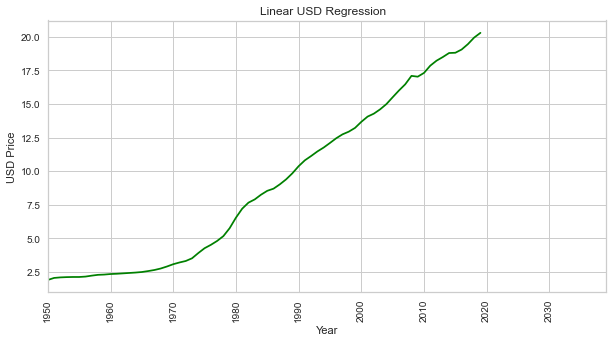

In [64]:
#Plots regression line for USD#
plt.title('Linear USD Regression  ')
plt.xlabel('Year')
plt.ylabel('USD Price')
plt.xticks(rotation=90)
plt.xlim(1950,2039)
plt.plot(X2,y2, color= 'green')


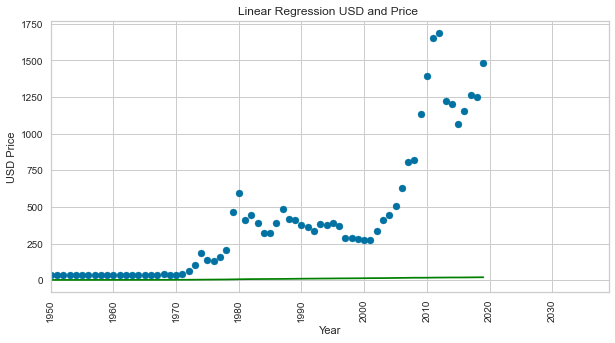

In [65]:
#Plots regression line with USD price#
plt.title('Linear Regression USD and Price ')
plt.xlabel('Year')
plt.ylabel('USD Price')
plt.xticks(rotation=90)
plt.xlim(1950,2039)
plt.scatter(xu,yu)
plt.plot(X2,y2, color= 'green')


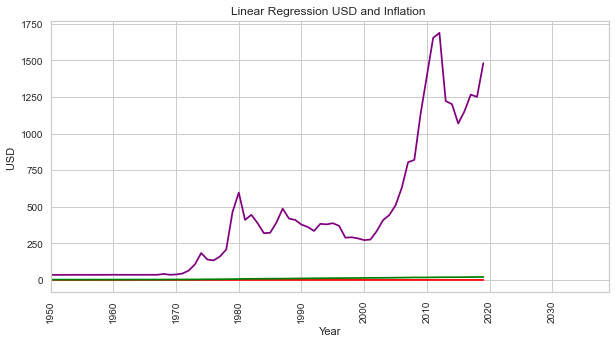

In [66]:
#Plots regression line vs USD inflation#
plt.title('Linear Regression USD and Inflation ')
plt.xlabel('Year')
plt.ylabel('USD ')
plt.xticks(rotation=90)
plt.xlim(1950,2039)
plt.plot(xi, yi, color='red')
plt.plot(X2,y2, color= 'green')
plt.plot(xu,yu, color='purple')


In [83]:
#Below is the prediction model formula we would utilize it has been commented out#
#Used exponetial growth formula to calculate#
#y= -77.0308 + .0398 * x#
#log(x0)= -77.0308 = x0= e^(-77.0308)= 3.515e-34
#b= e^(.0398)=1.04060263285
#x(t) = 3.5151885e-34 * 1.04060263285^(t)#

#Looks for 10 year predictor#
oneyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2020)
twoyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2021)
threeyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2022)
fouryear= .00000000000000000000000000000000035151885 * 1.04060263285**(2023)
fiveyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2024)
sixyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2025)
sevenyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2026)
eightyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2027)
nineyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2028)
tenyear= .00000000000000000000000000000000035151885 * 1.04060263285**(2029)
print(oneyear,
      twoyear,
      threeyear,
      fouryear,
      fiveyear,
      sixyear,
      sevenyear,
      eightyear,
      nineyear,
      tenyear)

28.939284135124915 30.114295263805218 31.337014937937994 32.60938025007806 33.933406943838015 35.311192607328316 36.7449199962593 38.23686049197004 39.789377699862165 41.404931193939646


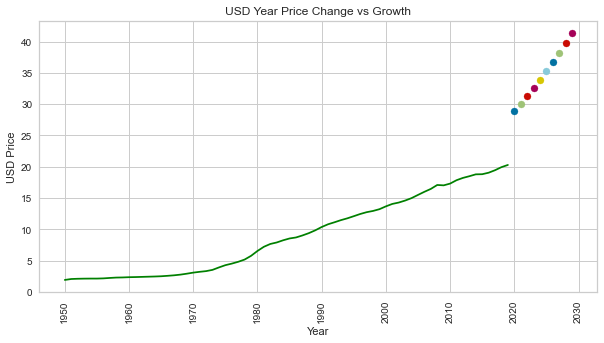

In [68]:
#Shows exponential growth the price of the USD to the year 2029 which is ten years from the date#
xu= YearlyUSD.YEAR
yu= YearlyUSD.PRICE
plt.title('USD Year Price Change vs Growth')
plt.xlabel('Year')
plt.ylabel('USD Price')
plt.xticks(rotation=90)
plt.scatter(2020, 28.94)
plt.scatter(2021, 30.11)
plt.scatter(2022, 31.34)
plt.scatter(2023, 32.61)
plt.scatter(2024, 33.93)
plt.scatter(2025, 35.31)
plt.scatter(2026, 36.75)
plt.scatter(2027, 38.24)
plt.scatter(2028, 39.79)
plt.scatter(2029, 41.405)
plt.plot(xu,yu, color= 'green')


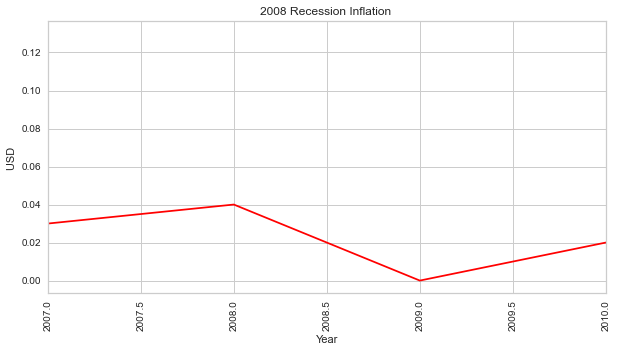

In [69]:
#Below will compare gold, the USD, and inflation during the major economic collapse of 2008#
plt.title('2008 Recession Inflation ')
plt.xlabel('Year')
plt.ylabel('USD ')
plt.xticks(rotation=90)
plt.xlim(2007, 2010)
plt.plot(xi, yi, color='red')



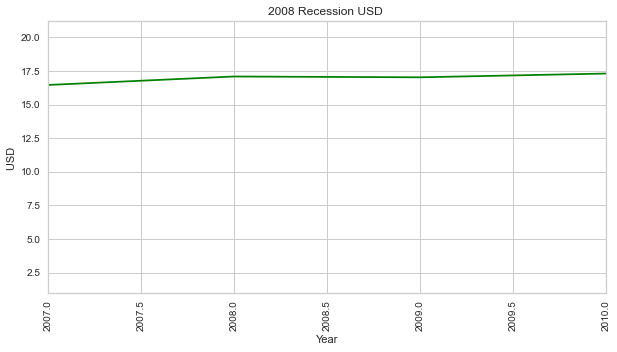

In [70]:
plt.title('2008 Recession USD ')
plt.xlabel('Year')
plt.ylabel('USD ')
plt.xticks(rotation=90)
plt.xlim(2007, 2010)
plt.plot(xu,yu, color='green')


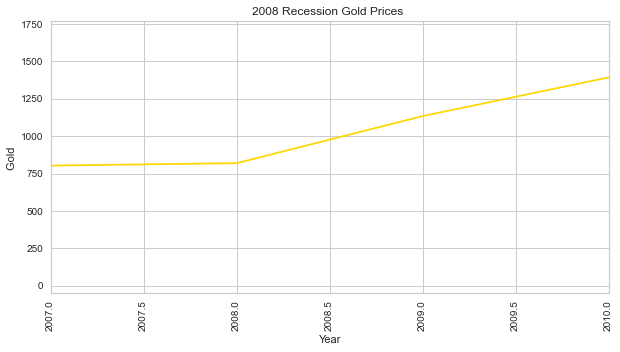

In [71]:
#Below will compare gold, the USD, and inflation during the major economic collapse of 2008#
plt.title('2008 Recession Gold Prices ')
plt.xlabel('Year')
plt.ylabel('Gold ')
plt.xticks(rotation=90)
plt.xlim(2007, 2010)
plt.plot(xg, yg, color='gold')


## Case Study Overview ##
This case study set out to look at what was more valuable since the 1950s and what is the better investment. The goal of this case study was to give investors a good and safe strategy going into these strange coronavirus times. However, my study creating some really strong results on what to do during normal times. The coronavirus may have created more questions than answers. As since I began this project we have seen many changes in policies and strategies. This impact will be felt, however if we base it off the past results of economic times and downturns the following results stand strong. 

After looking at the various data points and doing further tests, I have come to the assumption that gold is actually the strong investment for long-term growth than the USD. When looking at the data present gold has more long-term growth potential specifically when looking at historical trends and future exponential growth. When when see times of economic downturn or political unrest or even change in presidential power gold seems to always go up. I have looked into historical events that occurred as well and overall it looks like we are at the best investing situation for gold rather than the USD. I have also predicted the future prices as well as log functions to gain a better understanding of what may happen to the USD vs Gold. Overall, to me it looks as though gold has stood the test of time over the years, specifically it does even better during times of higher inflation. 

Looking at the data we see from the graph showing prices during the 2008 recession we can see that gold actually became more valuable over that period of time. This shows that during a recession period gold should be valued at a higher level than we would during regular economic times. In a period such as coronavirus we can actually see the in year over year graph above that gold did dip during good economic times, however since 2019 the value of gold is beginning to rebound. Which as we see the USD should actually become inverse to gold if we are actually headed into another recession.

Another interesting thing to note based off the above graphs is that inflation was actually at one of the lowest levels it has been in many years leading up to the coronavirus. Which is one of the main reasons for the strengthening of the USD. Low inflation rates mean higher dollar value, and as discussed causes the price of gold to actually decrease. 

However, with news of the federal government increasing spending, this may mean that inflation rates will increase. This can be seen in many times in history where the US government printed more money, in the graph above you can see rates rise in the late 70s to 80s due to the oil shortage and wars. Which caused a strain on the US economy and caused inflation rates to increase. Which is a type of period we may be headed towards. 

If we were utilizing this prediction model to decide what we should invest in for the next ten years especially during our economic distress and political change, it looks as though gold is the stronger investment. This is because gold has a higher increase in value over the years, and as stated above in recession climates gold typically acts as an inverse to a weak USD. 

However, there is a cavet to this prediction. This prediction is coming off the concept that we will continue in the same trajectory as we are currently going. The long-term impact of the coronavirus cannot be known at this time. In fact based off what we have seen if we go into a time of complete collapse we may see gold prices skyrocket or drop, it all depends on what the USD does. Which makes gold the better investment if the coronavirus does not negatively impact us any further. Based off the data and graphs presented gold has a stronger long-term value than the USD. 